# Run this 
1. this should work flawlessly.
2. Dataset should be accessabe. check label stduio url
3. SAVE AS .TF not h5. h5 sux
4. Save as .tflite for publishing to coral.
5. 

In [ ]:
import trainer
import numpy as np 
import matplotlib.pyplot as plt
import os, h5py  
import tensorflow as tf

In [ ]:
def from_the_beginning():
    # List of files to remove
    files_to_remove = [
        'exported_data.json',
        'labels.txt',
        'split_dataset.npy',
        'mfcc_features.npy',
        'model.tflite'
    ]

    # Remove the specified files if they exist
    for file in files_to_remove:
        try:
            if os.path.exists(file):
                os.remove(file)
                print(f"Removed: {file}")
            else:
                print(f"File not found: {file}")
        except Exception as e:
            print(f"Error removing {file}: {e}")
# from_the_beginning()

Removed: exported_data.json
Removed: labels.txt
Removed: split_dataset.npy
Removed: mfcc_features.npy
File not found: model.tflite


In [4]:
splited_dataset = trainer.prepare_data()     
mfcc_feature = trainer.get_mfcc(splited_dataset)

Data exported successfully.


  1%|          | 1/199 [00:02<07:55,  2.40s/it]d:\Projects\soundClassifier\soundClassifier\trainer.py:86: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_waveform, sample_rate = librosa.load(path, sr=32000)
C:\Users\Hoon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 48%|████▊     | 95/199 [00:10<00:11,  8.86it/s]

3f84618c-spacelab3.m4a
<class 'IndexError'> trainer.py 84
list index out of range


get_mfcc: 100%|██████████| 15/15 [00:17<00:00,  1.18s/it]


In [5]:
def get_fft(features):
    """Compute the FFT of the given features."""
    features = (features - np.mean(features)) / np.std(features)  # Normalize the features
    return np.fft.fft(features)

fft_features = {label: get_fft(features) for label, features in splited_dataset.items()}


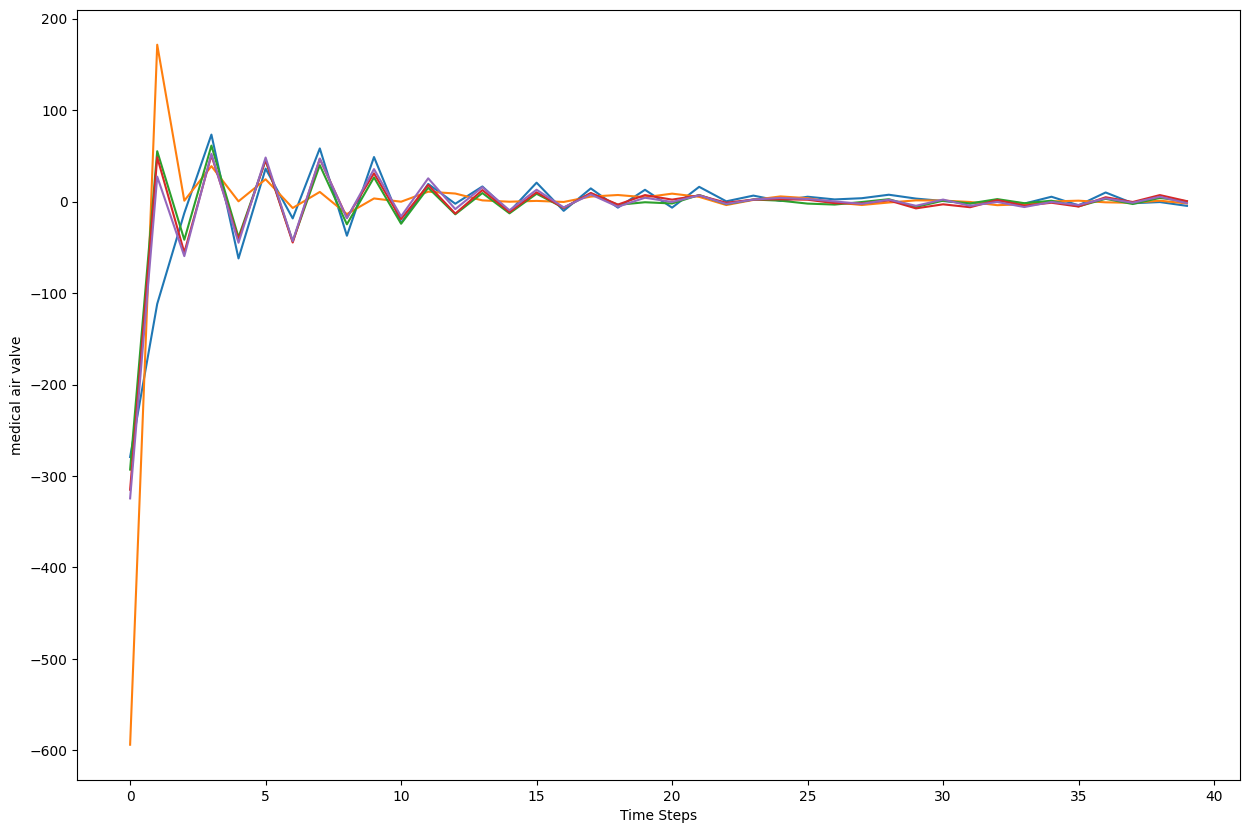

In [6]:
import random

# Plot random samples of values for each key in mfcc_features
fig  = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
for i, (label, features) in enumerate(mfcc_feature.items()):
    if label not in ['Sink/Water', 'medical air valve']:continue
    # ax = fig.add_subplot(len(mfcc_features), 1, i + 1)
    random_samples = random.sample(list(features), min(5, len(features)))  # Get up to 5 random samples
    for sample in random_samples:
        ax.plot(sample, label=label)

    # plt.title(f'Random Samples for {label}')
    ax.set_xlabel('Time Steps')
    ax.set_ylabel(f'{label}')
    # plt.legend()

# plt.tight_layout()
plt.show()

In [7]:

mfcc_features = {label: (features * 2 if label not in ['Rolling Carts', 'HVAC', 'Speech'] else features) for label, features in mfcc_feature.items()}

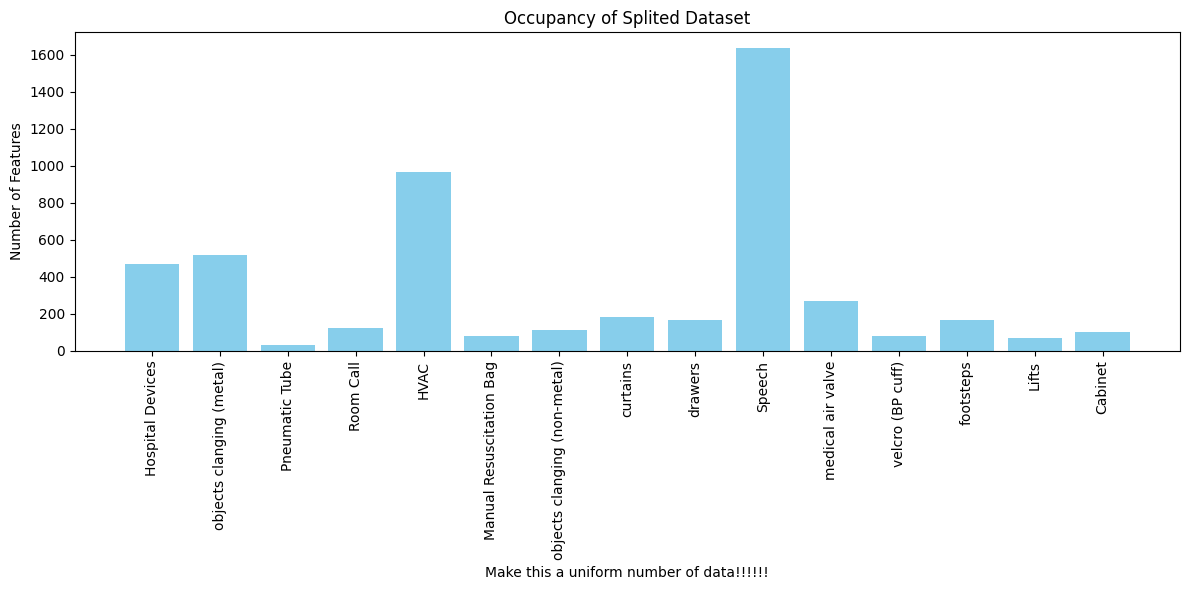

In [29]:
# Visualize the occupancy of the splited dataset
occupancy = {label: len(features) for label, features in mfcc_features.items()}
labels = list(occupancy.keys())
values = list(occupancy.values())

plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Make this a uniform number of data!!!!!!')
plt.ylabel('Number of Features')
plt.title('Occupancy of Splited Dataset')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('occupancy.png')    
plt.show()

In [9]:

x_train, x_test, y_train, y_test, label = trainer.split_data(mfcc_features)
with open('labels.txt', 'w') as f:
    for lbl in label:
        f.write(f"{lbl}\n")



Training set size: 3478
Testing set size: 1491


In [10]:
model = trainer.build_model(x_train, x_test, y_train, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 20, 32)            0         
 D)                                                              
                                                                 
 dense (Dense)               (None, 20, 32)            1056      
                                                                 
 dropout (Dropout)           (None, 20, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 10, 64)            0         
 g1D)                                                   

Epoch 1/100000
435/435 [==============================] - 2s 3ms/step - loss: 1.9639 - accuracy: 0.5066 - val_loss: 0.7953 - val_accuracy: 0.7941
Epoch 2/100000
435/435 [==============================] - 1s 2ms/step - loss: 0.8409 - accuracy: 0.7260 - val_loss: 0.4563 - val_accuracy: 0.8799
Epoch 3/100000
435/435 [==============================] - 1s 2ms/step - loss: 0.5819 - accuracy: 0.8197 - val_loss: 0.3493 - val_accuracy: 0.9054
Epoch 4/100000
435/435 [==============================] - 1s 2ms/step - loss: 0.4893 - accuracy: 0.8442 - val_loss: 0.2808 - val_accuracy: 0.9262
Epoch 5/100000
435/435 [==============================] - 1s 2ms/step - loss: 0.3994 - accuracy: 0.8755 - val_loss: 0.2290 - val_accuracy: 0.9289
Epoch 6/100000
435/435 [==============================] - 1s 3ms/step - loss: 0.3488 - accuracy: 0.8884 - val_loss: 0.2159 - val_accuracy: 0.9276
Epoch 7/100000
435/435 [==============================] - 1s 2ms/step - loss: 0.3269 - accuracy: 0.8890 - val_loss: 0.2053 -

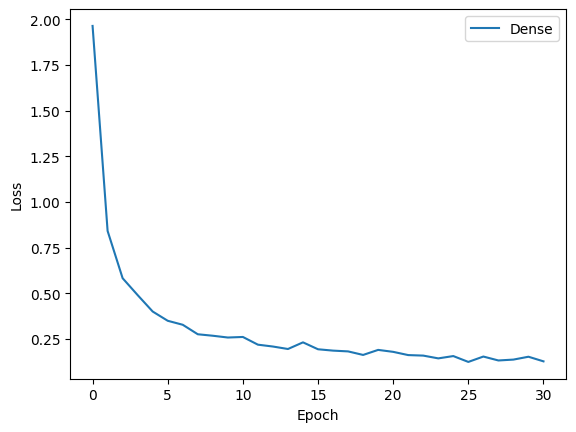

In [11]:

trainer.train(model, x_train, x_test, y_train, y_test)

In [ ]:
# trainer.evaluate(model, x_test, y_test, label)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on the test set
predictions = model.predict(x_test)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Generate a classification report
from sklearn.metrics import classification_report
report = classification_report(true_classes, predicted_classes, target_names=[label[i] for i in np.unique(true_classes)])
print(report)

# Plot a few test samples and their predicted labels
num_samples = len(true_classes)
plt.figure(figsize=(15, 5))
# for i in range(num_samples):
#     plt.subplot(1, num_samples, i + 1)
#     plt.plot(x_test[i])
labels = list(report.keys())[:-3]  
metrics = ['precision', 'recall', 'f1-score', 'support']
data = np.array([[report[label][metric] for metric in metrics] for label in labels])

plt.bar(range(num_samples), data, color='blue', alpha=0.5)
plt.title(f'Predicted: {label[predicted_classes[i]]}')
plt.axis('off')
plt.show()


47/47 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 0.9759
Test Loss: 0.0860
Test Accuracy: 0.9759
47/47 [==============================] - 0s 1ms/step
                              precision    recall  f1-score   support

            Hospital Devices       1.00      0.99      0.99       152
    objects clanging (metal)       0.99      0.98      0.99       159
              Pneumatic Tube       0.86      1.00      0.92         6
                   Room Call       1.00      1.00      1.00        47
                        HVAC       0.98      0.95      0.97       289
    Manual Resuscitation Bag       1.00      1.00      1.00        21
objects clanging (non-metal)       0.97      0.95      0.96        40
                    curtains       0.97      1.00      0.98        56
                     drawers       0.86      0.90      0.88        48
                      Speech       0.99      0.99      0.99       475
           medical air valve       0.98      0.98

TypeError: string indices must be integers

<Figure size 1500x500 with 0 Axes>

In [14]:
model.save('model.tf', save_format='tf')
print("Model saved as model.tf")

INFO:tensorflow:Assets written to: model.tf\assets


INFO:tensorflow:Assets written to: model.tf\assets


Model saved as model.tf


In [18]:
model2 = tf.keras.models.load_model('model.tf')
print("Model loaded as model2")

Model loaded as model2


In [19]:


# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model2)
tflite_model = converter.convert()

# Save the model to a .tflite file
with open('model2.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model saved as model.tflite")

INFO:tensorflow:Assets written to: C:\Users\Hoon\AppData\Local\Temp\tmpwqirc5jf\assets


INFO:tensorflow:Assets written to: C:\Users\Hoon\AppData\Local\Temp\tmpwqirc5jf\assets


Model saved as model.tflite


In [22]:
# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='model.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Model loaded successfully.")

Model loaded successfully.


In [24]:
def predict_labels(x_test, model_path='model.tflite'):
    # Load the TFLite model
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    # Get input and output tensors
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Prepare the input data
    x_test_input = np.array([x_test.reshape(1, len(x_test), 1)], dtype=np.float32)
    
    # Set the tensor for the input
    interpreter.set_tensor(input_details[0]['index'], x_test_input[0])

    # Run the model
    interpreter.invoke()

    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Process the output data
    predicted_classes_tflite = np.argmax(output_data, axis=1)[0]
    # Get the labels from the dataset
    
    return predicted_classes_tflite

In [25]:
t = len(x_test)
for x, y in zip(x_test, y_test):
    resx = label[predict_labels(x)]
    resy = label[np.argmax(y)]
    if resx != resy:
        print(resx, '\t\t != \t' , resy)
        t -=1

print(t/len(x_test))

Cabinet 		 != 	 HVAC
Cabinet 		 != 	 drawers
curtains 		 != 	 Speech
medical air valve 		 != 	 Speech
objects clanging (metal) 		 != 	 HVAC
HVAC 		 != 	 objects clanging (metal)
HVAC 		 != 	 objects clanging (non-metal)
curtains 		 != 	 HVAC
Speech 		 != 	 Hospital Devices
drawers 		 != 	 footsteps
Speech 		 != 	 objects clanging (metal)
Speech 		 != 	 objects clanging (metal)
drawers 		 != 	 HVAC
Pneumatic Tube 		 != 	 HVAC
drawers 		 != 	 Speech
Cabinet 		 != 	 HVAC
drawers 		 != 	 HVAC
medical air valve 		 != 	 Speech
Speech 		 != 	 Hospital Devices
HVAC 		 != 	 Speech
Speech 		 != 	 HVAC
drawers 		 != 	 HVAC
drawers 		 != 	 HVAC
Cabinet 		 != 	 HVAC
Cabinet 		 != 	 HVAC
HVAC 		 != 	 Speech
Cabinet 		 != 	 medical air valve
Cabinet 		 != 	 drawers
objects clanging (non-metal) 		 != 	 HVAC
Cabinet 		 != 	 medical air valve
HVAC 		 != 	 objects clanging (non-metal)
drawers 		 != 	 Cabinet
Cabinet 		 != 	 drawers
footsteps 		 != 	 HVAC
Cabinet 		 != 	 drawers
Cabinet 		 != 	 drawers
0.